In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from tqdm.notebook import tqdm

from ts_outlier_detection import *
from ts_outlier_detection.plotting import *

# TOF

  0%|          | 0/301 [00:00<?, ?it/s]

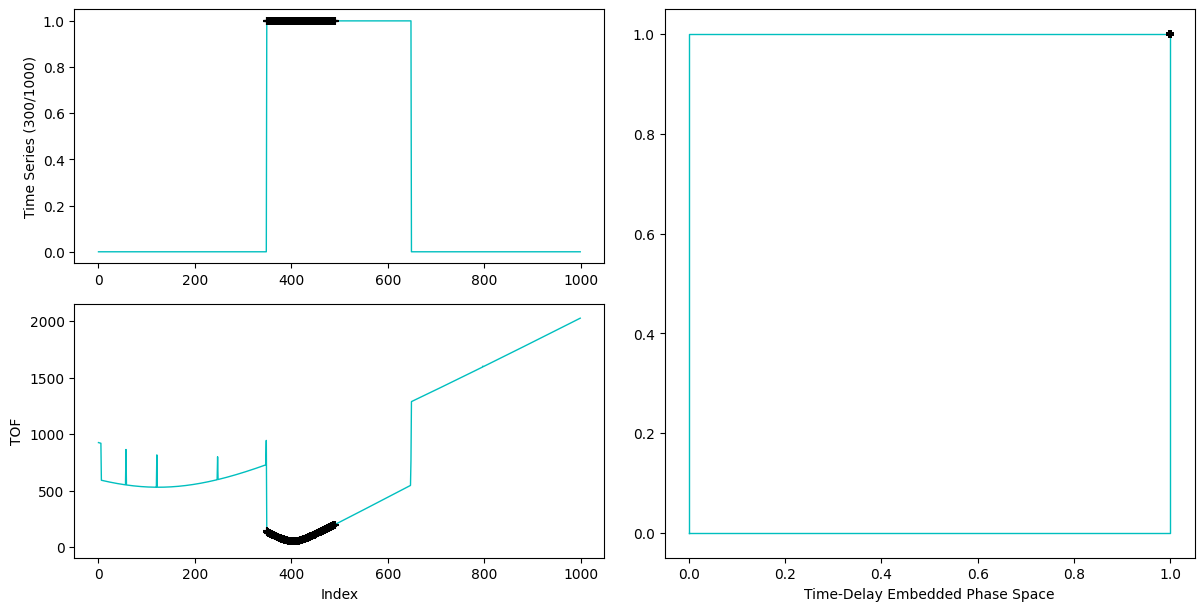

In [5]:
DATA_LENGTH = 1000
CTOF = TemporalOutlierFactor(dims=2, n_neighbors=10, event_length=200)
PLOTS = []

fig = plt.figure(figsize=(12,6), constrained_layout=True)
gs = fig.add_gridspec(2, 4)
rect1 = fig.add_subplot(gs[0,:2])
rect1.set_ylabel('Time Series')
rect2 = fig.add_subplot(gs[1,:2], sharex=rect1)
rect2.set_ylabel('TOF')
rect2.set_xlabel('Index')
square = fig.add_subplot(gs[:, 2:])
square.set_xlabel('Time-Delay Embedded Phase Space')

def animate(frame):
    global PLOTS
    data = np.zeros(DATA_LENGTH)
    middle = np.ceil(DATA_LENGTH/2) - 1
    bump = range(int(middle - frame/2), int(middle + frame/2))
    for i in bump: data[i] = 1
    rect1.set_ylabel(f'Time Series ({frame}/{DATA_LENGTH})')
    CTOF.fit(data)
    data_y, data_x = CTOF.get_truncated_data()
    for plot in PLOTS: plot.remove()
    PLOTS = [
        *plot_ts_outliers(CTOF, [rect1, rect2]),
        *plot_2d_phase_space(CTOF.get_embedded_data(), square, outlier_ids=CTOF.get_outlier_indices())
    ]
    return PLOTS

n_range = range(301)
anim = animation.FuncAnimation(
    fig, animate, frames=tqdm(n_range), interval=200, blit=True)
HTML(anim.to_html5_video())

# LOF

  0%|          | 0/301 [00:00<?, ?it/s]

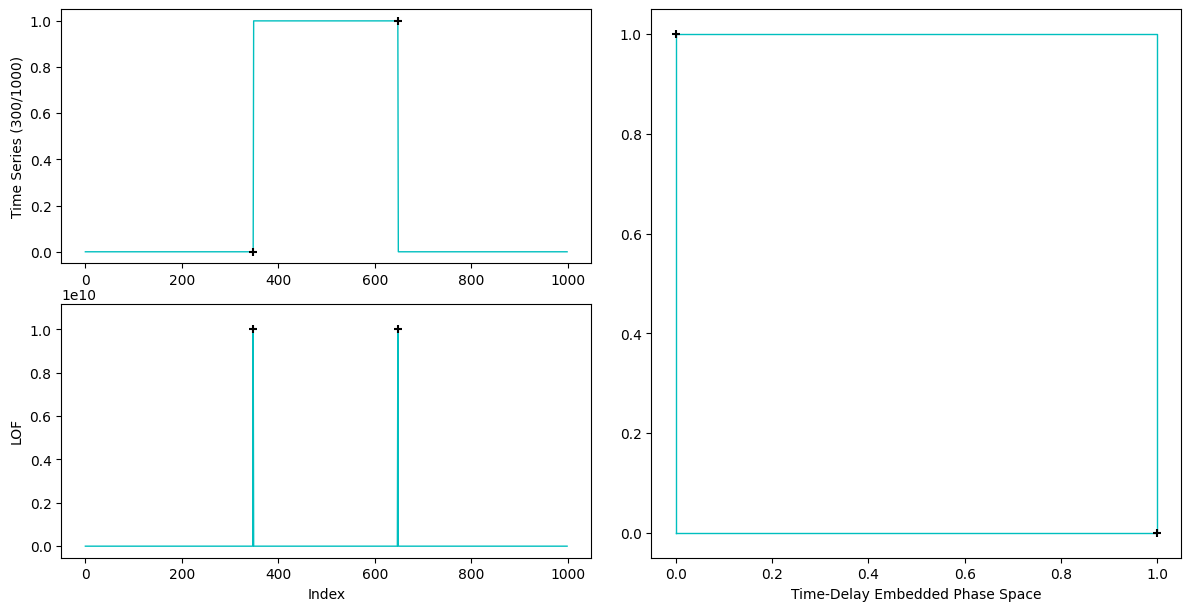

In [7]:
DATA_LENGTH = 1000
CLF = WindowedLocalOutlierFactor(dims=2, n_neighbors=10, crit_sigma=3)
PLOTS = []

fig = plt.figure(figsize=(12,6), constrained_layout=True)
gs = fig.add_gridspec(2, 4)
rect1 = fig.add_subplot(gs[0,:2])
rect1.set_ylabel('Time Series')
rect2 = fig.add_subplot(gs[1,:2], sharex=rect1)
rect2.set_ylabel('LOF')
rect2.set_xlabel('Index')
square = fig.add_subplot(gs[:, 2:])
square.set_xlabel('Time-Delay Embedded Phase Space')

def animate(frame):
    global PLOTS
    data = np.zeros(DATA_LENGTH)
    middle = np.ceil(DATA_LENGTH/2) - 1
    bump = range(int(middle - frame/2), int(middle + frame/2))
    for i in bump: data[i] = 1
    rect1.set_ylabel(f'Time Series ({frame}/{DATA_LENGTH})')
    CLF.fit(data)
    data_y, data_x = CLF.get_truncated_data()
    for plot in PLOTS: plot.remove()
    PLOTS = [
        *plot_ts_outliers(CLF, [rect1, rect2]),
        *plot_2d_phase_space(CLF.get_embedded_data(), square, outlier_ids=CLF.get_outlier_indices())
    ]
    return PLOTS

n_range = range(301)
anim = animation.FuncAnimation(
    fig, animate, frames=tqdm(n_range), interval=200, blit=True)
HTML(anim.to_html5_video())